# torch classification 

In [1]:
!pip install scikit-learn seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
data = load_iris()

In [4]:
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [8]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


<Axes: >

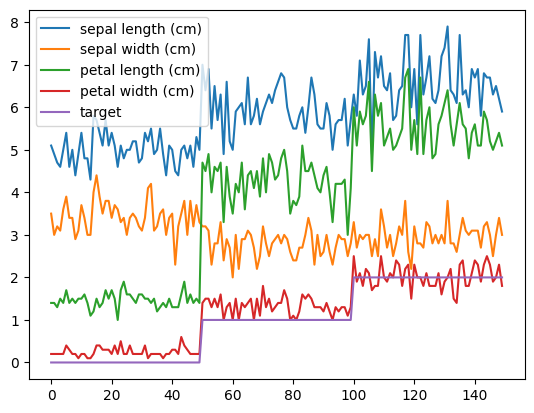

In [14]:
df.plot()

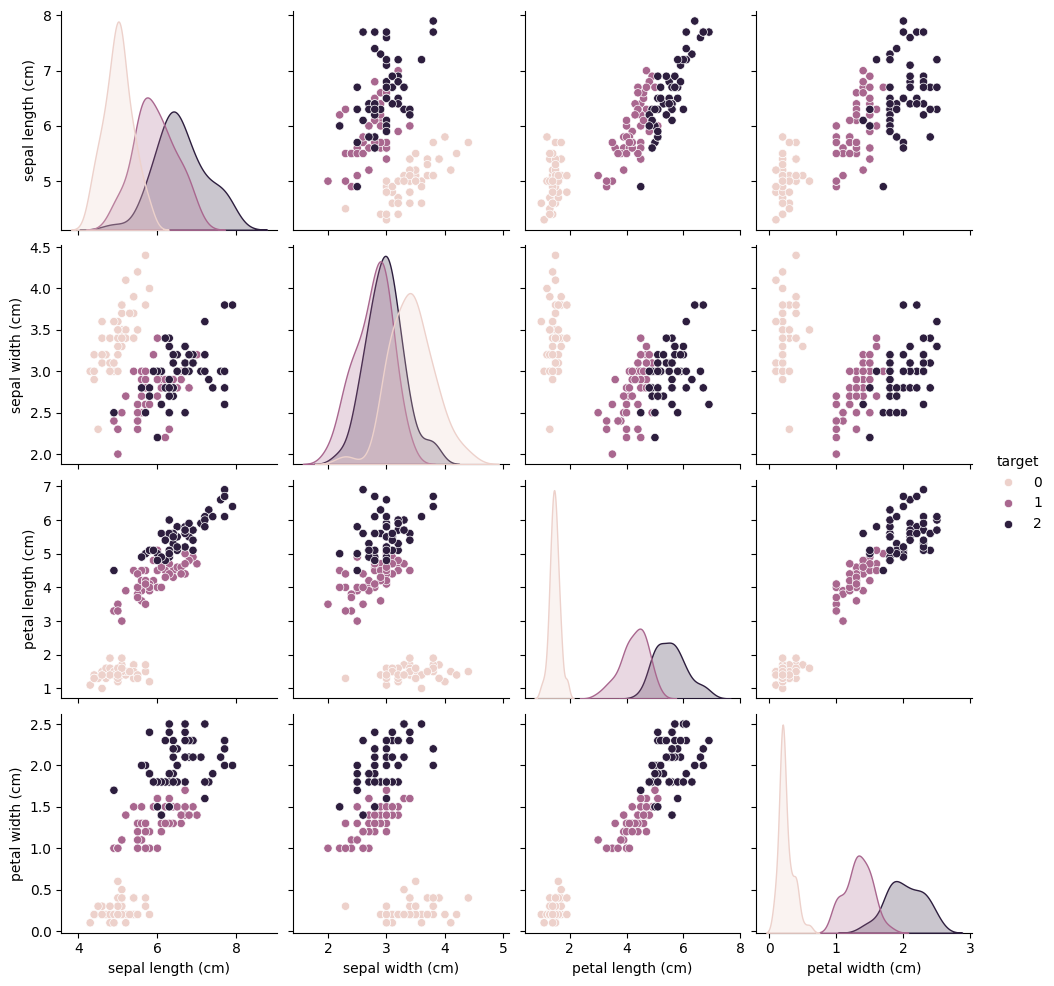

In [16]:
sns.pairplot(df, hue='target')

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [18]:
class IrisModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(IrisModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = F.softmax(output, dim=1)
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return output, value

In [19]:
X = torch.Tensor(data.data)
y = torch.LongTensor(data.target)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [21]:
model = IrisModel(4, 3) # 입력은 4, 출력은 3종류의 확률

In [22]:
print(X_train.shape)

torch.Size([120, 4])


In [23]:
print(y_train.shape) 

torch.Size([120])


In [24]:
print(X_train[0].shape)

torch.Size([4])


In [25]:
print(torch.unsqueeze(X_train[0], dim=0).shape)

torch.Size([1, 4])


In [26]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[0], dim=0))
    print(y)
    print(F.softmax(y))
    print(F.softmax(y).sum())
    print(np.argmax(y), y_train[0])

tensor([[ 0.2783, -0.4726, -0.8226]])
tensor([[0.5542, 0.2615, 0.1843]])
tensor(1.)
tensor(0) tensor(2)


/tmp/ipykernel_54064/113627717.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(y))
/tmp/ipykernel_54064/113627717.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(y).sum())


In [27]:
print(y.shape)

torch.Size([1, 3])


In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
print(model)

IrisModel(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [30]:
model = IrisModel(4, 3) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 10000 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 1.363881230354309
epoch 1000th loss: 0.043035998940467834
epoch 2000th loss: 0.04015683755278587
epoch 3000th loss: 0.03812980651855469
epoch 4000th loss: 0.03629113733768463
epoch 5000th loss: 0.035645462572574615
epoch 6000th loss: 0.035323143005371094
epoch 7000th loss: 0.03521650284528732
epoch 8000th loss: 0.03512822836637497
epoch 9000th loss: 0.0351325161755085


In [31]:
n = 100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[ 16.8412,   0.7812, -19.4614]])
tensor(-1.8389)
tensor(0) tensor(0)


In [32]:
model = IrisModel(4, 3) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 10000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 1.3751487731933594 test loss: 1.649186372756958
epoch 1000th training loss: 0.04299505800008774 test loss: 0.11151967942714691
epoch 2000th training loss: 0.04023987427353859 test loss: 0.07459057867527008
epoch 3000th training loss: 0.039467547088861465 test loss: 0.05501645803451538
epoch 4000th training loss: 0.03935462608933449 test loss: 0.05061592161655426
epoch 5000th training loss: 0.03934146836400032 test loss: 0.04989457130432129
epoch 6000th training loss: 0.03933676704764366 test loss: 0.04972004145383835
epoch 7000th training loss: 0.03933418169617653 test loss: 0.04976252466440201
epoch 8000th training loss: 0.03933276981115341 test loss: 0.0497850701212883
epoch 9000th training loss: 0.03933160379528999 test loss: 0.049738410860300064


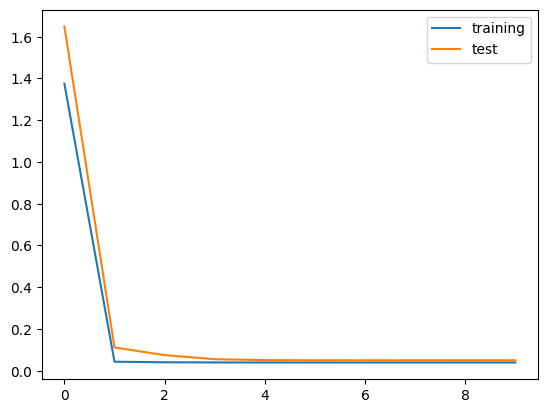

In [33]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.9666666666666667
